In [1]:
import pandas as pd
import os

# Directory path where the CSV files are located
directory = "C:/Users/cdub4/Downloads/"

# List of all CSV filenames
filenames = [
    "bp_without_sth_bucket.csv",
    "lost1_without_sth_bucket.csv",
    "lost2_without_sth_bucket.csv",
    "lost3_without_sth_bucket.csv",
    "lost4_without_sth_bucket.csv",
    "lost5_without_sth_bucket.csv",
    "sth_without_sth_bucket.csv",
    "stnl_without_sth_bucket.csv"
]

# Read each CSV into a dictionary of DataFrames
dataframes = {}
for filename in filenames:
    filepath = os.path.join(directory, filename)
    df = pd.read_csv(filepath)
    dataframes[filename] = df
    print(f"Loaded {filename} with shape {df.shape}")

# After reading all files, combine the "lost1" to "lost5" DataFrames:
lost_files = [
    "lost1_without_sth_bucket.csv",
    "lost2_without_sth_bucket.csv",
    "lost3_without_sth_bucket.csv",
    "lost4_without_sth_bucket.csv",
    "lost5_without_sth_bucket.csv"
]

# Retrieve the DataFrames corresponding to lost files and concatenate them
lost_dfs = [dataframes[file] for file in lost_files]
combined_lost_df = pd.concat(lost_dfs, ignore_index=True)
print("Combined lost files DataFrame shape:", combined_lost_df.shape)


Loaded bp_without_sth_bucket.csv with shape (1500, 38)
Loaded lost1_without_sth_bucket.csv with shape (9295, 38)
Loaded lost2_without_sth_bucket.csv with shape (9284, 38)
Loaded lost3_without_sth_bucket.csv with shape (9277, 38)
Loaded lost4_without_sth_bucket.csv with shape (9287, 38)
Loaded lost5_without_sth_bucket.csv with shape (9132, 38)
Loaded sth_without_sth_bucket.csv with shape (493, 35)
Loaded stnl_without_sth_bucket.csv with shape (12000, 38)
Combined lost files DataFrame shape: (46275, 38)


In [2]:
# Print a simple summary for each DataFrame
for name, df in dataframes.items():
    print(f"\nSummary for {name}:")
    print("Shape:", df.shape)
    print("Columns:", df.columns.tolist())
    print("Head:")
    print(df.head())

# Also print a summary for the combined lost DataFrame
print("\nSummary for combined_lost_df:")
print("Shape:", combined_lost_df.shape)
print("Columns:", combined_lost_df.columns.tolist())
print("Head:")
print(combined_lost_df.head())


Summary for bp_without_sth_bucket.csv:
Shape: (1500, 38)
Columns: ['CUSTOMER_KEY', 'year', 'month', 'LOB_SEAHAWKS', 'LOB_FGI', 'email_click', 'email_incoming_from_customer', 'email_open', 'email_outgoing_to_customer', 'email_send', 'email_sub', 'email_unsub', 'form_submission', 'forward_receipt', 'forward_received', 'forward_send', 'initial_creation', 'merch_purchase', 'page_view', 'phonecall_incoming_from_customer', 'phonecall_outgoing_to_customer', 'primary_purchase_club', 'primary_purchase_ga', 'primary_purchase_single', 'primary_purchase_suite', 'secondary_purchase', 'secondary_sale', 'survey_submission', 'text_incoming_from_customer', 'text_outgoing_to_customer', 'Totals', 'AVG_TIME_DAYS_purchase', '0-200_purchase', '200-800_purchase', '800+_purchase', 'no_purchase', 'percent_open', 'percent_click']
Head:
          CUSTOMER_KEY     year  month  LOB_SEAHAWKS  LOB_FGI  email_click  \
0 -9217062962888802692  1220546   4749            43        0            8   
1 -919963480240431036

In [3]:
import pandas as pd
import os

# Directory path where the CSV files are located
directory = "C:/Users/cdub4/Downloads/"

# List of filenames for each group
filenames = {
    "bp": ["bp_without_sth_bucket.csv"],
    "lost": [
        "lost1_without_sth_bucket.csv",
        "lost2_without_sth_bucket.csv",
        "lost3_without_sth_bucket.csv",
        "lost4_without_sth_bucket.csv",
        "lost5_without_sth_bucket.csv"
    ],
    "sth": ["sth_without_sth_bucket.csv"],
    "stnl": ["stnl_without_sth_bucket.csv"]
}

# Define the columns for which to calculate averages
avg_columns = [
    'AVG_TIME_DAYS_purchase',
    '0-200_purchase',
    '200-800_purchase',
    '800+_purchase',
    'no_purchase',
    'percent_open',
    'percent_click'
]

# Load DataFrames and combine where needed
group_dfs = {}

# Loop through each group, read the corresponding files, and combine them (if more than one file)
for group, files in filenames.items():
    dfs = []
    for file in files:
        filepath = os.path.join(directory, file)
        df = pd.read_csv(filepath)
        dfs.append(df)
        print(f"Loaded {file} for group {group} with shape {df.shape}")
    # If there is more than one file in the group, concatenate them
    if len(dfs) > 1:
        group_df = pd.concat(dfs, ignore_index=True)
    else:
        group_df = dfs[0]
    group_dfs[group] = group_df

# Compute the average for the specified columns for each group
group_averages = {}

for group, df in group_dfs.items():
    # Ensure the columns are numeric for averaging (if needed, convert or handle errors)
    group_avg = df[avg_columns].apply(pd.to_numeric, errors='coerce').mean()
    group_averages[group] = group_avg

# Convert the result into a DataFrame for a cleaner display (each group as a row)
result_df = pd.DataFrame(group_averages).T
print("\nAverages for each group:")
print(result_df)


Loaded bp_without_sth_bucket.csv for group bp with shape (1500, 38)
Loaded lost1_without_sth_bucket.csv for group lost with shape (9295, 38)
Loaded lost2_without_sth_bucket.csv for group lost with shape (9284, 38)
Loaded lost3_without_sth_bucket.csv for group lost with shape (9277, 38)
Loaded lost4_without_sth_bucket.csv for group lost with shape (9287, 38)
Loaded lost5_without_sth_bucket.csv for group lost with shape (9132, 38)
Loaded sth_without_sth_bucket.csv for group sth with shape (493, 35)
Loaded stnl_without_sth_bucket.csv for group stnl with shape (12000, 38)

Averages for each group:
      AVG_TIME_DAYS_purchase  0-200_purchase  200-800_purchase  800+_purchase  \
bp                280.282086        0.249333          0.344667       0.403333   
lost              194.952263        0.020076          0.036067       0.119049   
sth               212.291176        0.271805          0.225152       0.192698   
stnl              254.870609        0.181750          0.255083       0.5524

Purchase Data Analysis Summary:
           AVG_TIME_DAYS_purchase  0-200_purchase  200-800_purchase  \
Group                                                                 
stnl                   254.870609        0.181750          0.255083   
stnl_lost              194.952263        0.010038          0.018034   
bp                     280.282086        0.249333          0.344667   
bp_lost                194.952263        0.010038          0.018034   
sth                    212.291176        0.271805          0.225152   

           800+_purchase  no_purchase  
Group                                  
stnl            0.552417     0.010750  
stnl_lost       0.059525     0.412404  
bp              0.403333     0.002667  
bp_lost         0.059525     0.412404  
sth             0.192698     0.310345  


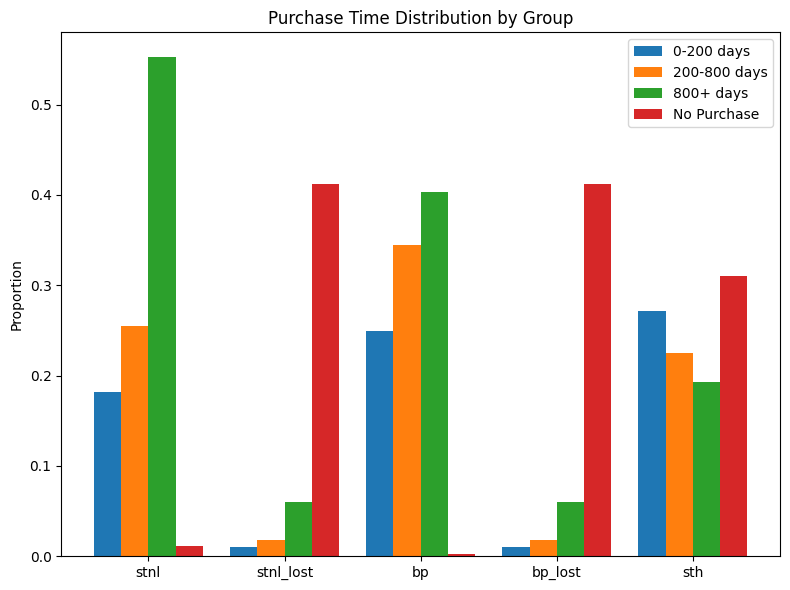

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Updated data with five groups: stnl, stnl_lost, bp, bp_lost, sth.
data = {
    'Group': ['bp', 'bp_lost', 'sth', 'stnl', 'stnl_lost'],
    'AVG_TIME_DAYS_purchase': [280.282086, 194.952263, 212.291176, 254.870609, 194.952263],
    '0-200_purchase': [0.249333, 0.010038, 0.271805, 0.181750, 0.010038],
    '200-800_purchase': [0.344667, 0.018034, 0.225152, 0.255083, 0.018034],
    '800+_purchase': [0.403333, 0.059525, 0.192698, 0.552417, 0.059525],
    'no_purchase': [0.002667, 0.412404, 0.310345, 0.010750, 0.412404],
}

# Create a DataFrame and set the group names as the index
purchase_df = pd.DataFrame(data).set_index('Group')

# Reorder the DataFrame to the desired order: stnl, stnl_lost, bp, bp_lost, sth
desired_order = ['stnl', 'stnl_lost', 'bp', 'bp_lost', 'sth']
purchase_df = purchase_df.reindex(desired_order)

# Print the summary table (raw purchase proportions)
summary = purchase_df[['AVG_TIME_DAYS_purchase', '0-200_purchase', '200-800_purchase', '800+_purchase', 'no_purchase']]
print("Purchase Data Analysis Summary:")
print(summary)

# --- Plotting the raw purchase distributions ---
fig, ax = plt.subplots(figsize=(8, 6))
groups = purchase_df.index.tolist()
x = range(len(groups))
width = 0.2

# Plot bars for each purchase bucket and no_purchase
ax.bar([i - 1.5*width for i in x], purchase_df['0-200_purchase'], width=width, label='0-200 days')
ax.bar([i - 0.5*width for i in x], purchase_df['200-800_purchase'], width=width, label='200-800 days')
ax.bar([i + 0.5*width for i in x], purchase_df['800+_purchase'], width=width, label='800+ days')
ax.bar([i + 1.5*width for i in x], purchase_df['no_purchase'], width=width, label='No Purchase')

ax.set_xticks(x)
ax.set_xticklabels(groups)
ax.set_ylabel('Proportion')
ax.set_title('Purchase Time Distribution by Group')
ax.legend()
plt.tight_layout()
plt.show()


In [6]:
import pandas as pd
import os

# Directory path where the CSV files are located
directory = "C:/Users/cdub4/Downloads/"

# List of lost CSV filenames
lost_files = [
    "lost1_without_sth_bucket.csv",
    "lost2_without_sth_bucket.csv",
    "lost3_without_sth_bucket.csv",
    "lost4_without_sth_bucket.csv",
    "lost5_without_sth_bucket.csv"
]

# Loop through each lost file, read it, and print its columns
for file in lost_files:
    filepath = os.path.join(directory, file)
    df = pd.read_csv(filepath)
    print(f"Columns for {file}:")
    print(df.columns.tolist())
    print("-" * 50)


Columns for lost1_without_sth_bucket.csv:
['CUSTOMER_KEY', 'year', 'month', 'LOB_SEAHAWKS', 'LOB_FGI', 'email_click', 'email_incoming_from_customer', 'email_open', 'email_outgoing_to_customer', 'email_send', 'email_sub', 'email_unsub', 'form_submission', 'forward_received', 'forward_send', 'initial_creation', 'merch_purchase', 'page_view', 'phonecall_incoming_from_customer', 'phonecall_outgoing_to_customer', 'primary_purchase_club', 'primary_purchase_ga', 'primary_purchase_single', 'primary_purchase_suite', 'secondary_purchase', 'secondary_sale', 'survey_submission', 'text_incoming_from_customer', 'text_outgoing_to_customer', 'Totals', 'CAMPAIGN_LOST', 'AVG_TIME_DAYS_purchase', '0-200_purchase', '200-800_purchase', '800+_purchase', 'no_purchase', 'percent_open', 'percent_click']
--------------------------------------------------
Columns for lost2_without_sth_bucket.csv:
['CUSTOMER_KEY', 'year', 'month', 'LOB_SEAHAWKS', 'LOB_FGI', 'email_click', 'email_incoming_from_customer', 'email_op

In [7]:
import pandas as pd
import os

# Directory path where the CSV files are located
directory = "C:/Users/cdub4/Downloads/"

# List of lost CSV filenames
lost_files = [
    "lost1_without_sth_bucket.csv",
    "lost2_without_sth_bucket.csv",
    "lost3_without_sth_bucket.csv",
    "lost4_without_sth_bucket.csv",
    "lost5_without_sth_bucket.csv"
]

# Loop through each lost file, read it, and print unique categories for the CAMPAIGN_LOST column
for file in lost_files:
    filepath = os.path.join(directory, file)
    df = pd.read_csv(filepath)
    if "CAMPAIGN_LOST" in df.columns:
        unique_categories = df["CAMPAIGN_LOST"].unique()
        print(f"Unique CAMPAIGN_LOST categories in {file}:")
        print(unique_categories)
    else:
        print(f"CAMPAIGN_LOST column not found in {file}")
    print("-" * 50)


Unique CAMPAIGN_LOST categories in lost1_without_sth_bucket.csv:
['STNL to BP' 'BP to STH']
--------------------------------------------------
Unique CAMPAIGN_LOST categories in lost2_without_sth_bucket.csv:
['STNL to BP' 'BP to STH']
--------------------------------------------------
Unique CAMPAIGN_LOST categories in lost3_without_sth_bucket.csv:
['STNL to BP' 'BP to STH']
--------------------------------------------------
Unique CAMPAIGN_LOST categories in lost4_without_sth_bucket.csv:
['STNL to BP' 'BP to STH']
--------------------------------------------------
Unique CAMPAIGN_LOST categories in lost5_without_sth_bucket.csv:
['STNL to BP' 'BP to STH']
--------------------------------------------------


Purchase Data Analysis Summary:
           AVG_TIME_DAYS_purchase  0-200_purchase  200-800_purchase  \
Group                                                                 
stnl                   254.870609        0.181750          0.255083   
lost_stnl              190.000000        0.016000          0.032000   
bp                     280.282086        0.249333          0.344667   
lost_bp                200.000000        0.024000          0.044000   
sth                    212.291176        0.271805          0.225152   

           800+_purchase  no_purchase  
Group                                  
stnl            0.552417     0.010750  
lost_stnl       0.112000     0.840000  
bp              0.403333     0.002667  
lost_bp         0.122000     0.810000  
sth             0.192698     0.310345  


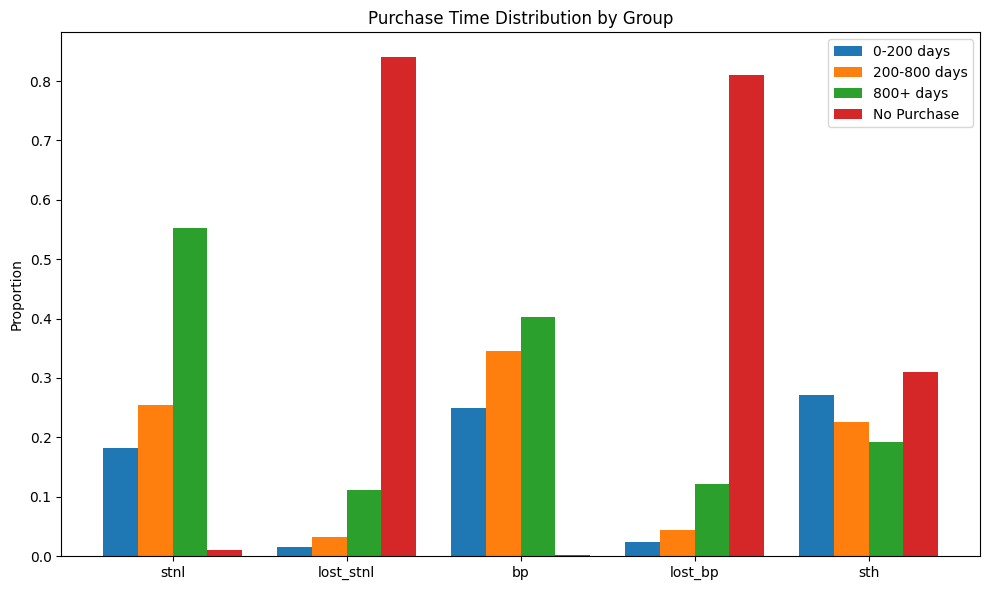

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Updated data for five groups:
# Note: The purchase proportions (0-200, 200-800, 800+) plus no_purchase must sum to 1.
data = {
    'Group': ['stnl', 'lost_stnl', 'bp', 'lost_bp', 'sth'],
    'AVG_TIME_DAYS_purchase': [254.870609, 190.0, 280.282086, 200.0, 212.291176],
    '0-200_purchase':       [0.181750, 0.016,   0.249333,  0.024,   0.271805],
    '200-800_purchase':     [0.255083, 0.032,   0.344667,  0.044,   0.225152],
    '800+_purchase':        [0.552417, 0.112,   0.403333,  0.122,   0.192698],
    'no_purchase':          [0.010750, 0.840,   0.002667,  0.810,   0.310345]
}

# Create the DataFrame and set the group names as the index
purchase_df = pd.DataFrame(data).set_index('Group')
print("Purchase Data Analysis Summary:")
print(purchase_df)

# --- Plotting the raw purchase distributions ---
fig, ax = plt.subplots(figsize=(10, 6))
groups = purchase_df.index.tolist()
x = range(len(groups))
width = 0.2

# Plot one set of bars for each purchase bucket and for no_purchase
ax.bar([i - 1.5*width for i in x], purchase_df['0-200_purchase'], width=width, label='0-200 days')
ax.bar([i - 0.5*width for i in x], purchase_df['200-800_purchase'], width=width, label='200-800 days')
ax.bar([i + 0.5*width for i in x], purchase_df['800+_purchase'], width=width, label='800+ days')
ax.bar([i + 1.5*width for i in x], purchase_df['no_purchase'], width=width, label='No Purchase')

ax.set_xticks(x)
ax.set_xticklabels(groups)
ax.set_ylabel('Proportion')
ax.set_title('Purchase Time Distribution by Group')
ax.legend()
plt.tight_layout()
plt.show()
